In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/Users/binita/Codegravity_DataEng/DataEngineer.csv')
data.head()

Job Title  \
0                                      Data Engineer   
1  Senior Data Engineer (Healthcare Domain experi...   
2                                     Data Engineers   
3                      Client Trade Support Engineer   
4                                      Data Engineer   

               Salary Estimate  \
0  $80K-$150K (Glassdoor est.)   
1  $80K-$150K (Glassdoor est.)   
2  $80K-$150K (Glassdoor est.)   
3  $80K-$150K (Glassdoor est.)   
4  $80K-$150K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Company Description\nSagence is a management a...     4.5   
1  Key Responsibilities\n\n- Architect, build, an...     3.4   
2  Overview\n\nJob description\n\nPosition Overvi...     5.0   
3  About the Position\n\n\nThis position will sup...     4.8   
4  Data Engineer\n\nJob Details\nLevel\nExperienc...     3.7   

                   Company Name      Location      Headquarters  \
0                  Sagence\n4.5  New York, NY       Chicago, IL   
1   Enterprise Integration\n3.4  New York, NY  Jacksonville, FL   
2     Maestro Technologies\n5.0  New York, NY       Trenton, NJ   
3              Jane Street\n4.8  New York, NY      New York, NY   
4  GNY Insurance Companies\n3.7  New York, NY      New York, NY   

                    Size  Founded  Type of ownership  \
0      1 to 50 employees     2009  Company - Private   
1    51 to 200 employees     1998  Company - Private   
2    51 to 200 employees     2003  Company - Private   
3  501 to 1000 employees     2000  Company - Private   
4   201 to 500 employees     1914  Company - Private   

                                Industry                  Sector  \
0                             Consulting       Business Services   
1                            IT Services  Information Technology   
2                            IT Services  Information Technology   
3  Investment Banking & Asset Management                 Finance   
4                     Insurance Carriers               Insurance   

                      Revenue                       Competitors Easy Apply  
0    $10 to $25 million (USD)               WCI Consulting, PwC         -1  
1    $25 to $50 million (USD)                                -1         -1  
2     $5 to $10 million (USD)                                -1         -1  
3    Unknown / Non-Applicable                                -1         -1  
4  $100 to $500 million (USD)  Travelers, Chubb, Crum & Forster       True

In [ ]:
#checking for Null Values
print(data.isnull().sum())
print(data.info())

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Ty

In [ ]:
#Refactoring Coulmns and Extracting Data
data['Company Name'] = data['Company Name'].str.replace('\n.*','')
Location = data['Location'].str.split(',', expand=True,)
City = Location[0]
State = Location[1]
data['City'] = Location[0]
data['State'] = Location[1]

C:\Users\Pravasis Dhakal\AppData\Local\Temp\ipykernel_25372\3935425391.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Company Name'] = data['Company Name'].str.replace('\n.*','')


In [ ]:
Salary = data['Salary Estimate'].str.split('-', expand=True)
Min = Salary[0].str.replace('$', '').str.replace('K', '')
Max = Salary[1].str.replace('$', '').str.replace('K', '').str.replace('\(G.*', '')
data['Min Salary'] = Min
data['Max Salary'] = Max
data.drop('Salary Estimate', axis=1, inplace=True )

C:\Users\Pravasis Dhakal\AppData\Local\Temp\ipykernel_25372\2904328115.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Min = Salary[0].str.replace('$', '').str.replace('K', '')
C:\Users\Pravasis Dhakal\AppData\Local\Temp\ipykernel_25372\2904328115.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Max = Salary[1].str.replace('$', '').str.replace('K', '').str.replace('\(G.*', '')
C:\Users\Pravasis Dhakal\AppData\Local\Temp\ipykernel_25372\2904328115.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Max = Salary[1].str.replace('$', '').str.replace('K', '').str.replace('\(G.*', '')


In [ ]:
data.drop('Location', axis=1, inplace=True)
data.drop('Headquarters', axis=1, inplace=True)


In [ ]:
data['Type of ownership'].value_counts()

Company - Private                 1392
Company - Public                   754
Subsidiary or Business Segment     126
-1                                 119
Nonprofit Organization              48
Unknown                             30
Government                          21
College / University                13
Contract                            10
Private Practice / Firm              6
Other Organization                   4
Hospital                             3
Self-employed                        1
School / School District             1
Name: Type of ownership, dtype: int64

In [ ]:
data['Easy Apply'].value_counts()

-1      2382
True     146
Name: Easy Apply, dtype: int64

In [ ]:
data['Easy Apply'].replace('-1', False, inplace=True)
data['Easy Apply'].value_counts()

False    2382
True      146
Name: Easy Apply, dtype: int64

In [ ]:
# data['Job Title'].replace('Sr.', 'Senior', inplace=True)
# data['Job Title'].replace('Sr', 'Senior', inplace=True)
data['Job Title'].drop_duplicates().values

array(['Data Engineer',
       'Senior Data Engineer (Healthcare Domain experience required)',
       'Data Engineers', ..., 'F35 Software Engineer',
       'Software Engineer - AJ',
       'Future Opportunities: Software Development Engineer'],
      dtype=object)

In [ ]:
data['Job Title'] = data['Job Title'].str.replace('Sr.', 'Senior')

C:\Users\Pravasis Dhakal\AppData\Local\Temp\ipykernel_25372\3985013013.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Job Title'] = data['Job Title'].str.replace('Sr.', 'Senior')


In [ ]:
data['Job Title'].value_counts()

Data Engineer                                          469
Senior Data Engineer                                   138
Software Engineer                                       93
Big Data Engineer                                       73
Machine Learning Engineer                               17
                                                      ... 
Senior Data Engineer (AWS)                               1
Data Center Hardware Engineer I                          1
Tier II TAC Engineer                                     1
IT Support Engineer I                                    1
Future Opportunities: Software Development Engineer      1
Name: Job Title, Length: 1252, dtype: int64

In [ ]:
job_count = data['Job Title'].value_counts().rename_axis('Job Title').reset_index(name='Counts')
job_count

Job Title  Counts
0                                         Data Engineer     469
1                                  Senior Data Engineer     138
2                                     Software Engineer      93
3                                     Big Data Engineer      73
4                             Machine Learning Engineer      17
...                                                 ...     ...
1247                         Senior Data Engineer (AWS)       1
1248                    Data Center Hardware Engineer I       1
1249                               Tier II TAC Engineer       1
1250                              IT Support Engineer I       1
1251  Future Opportunities: Software Development Eng...       1

[1252 rows x 2 columns]

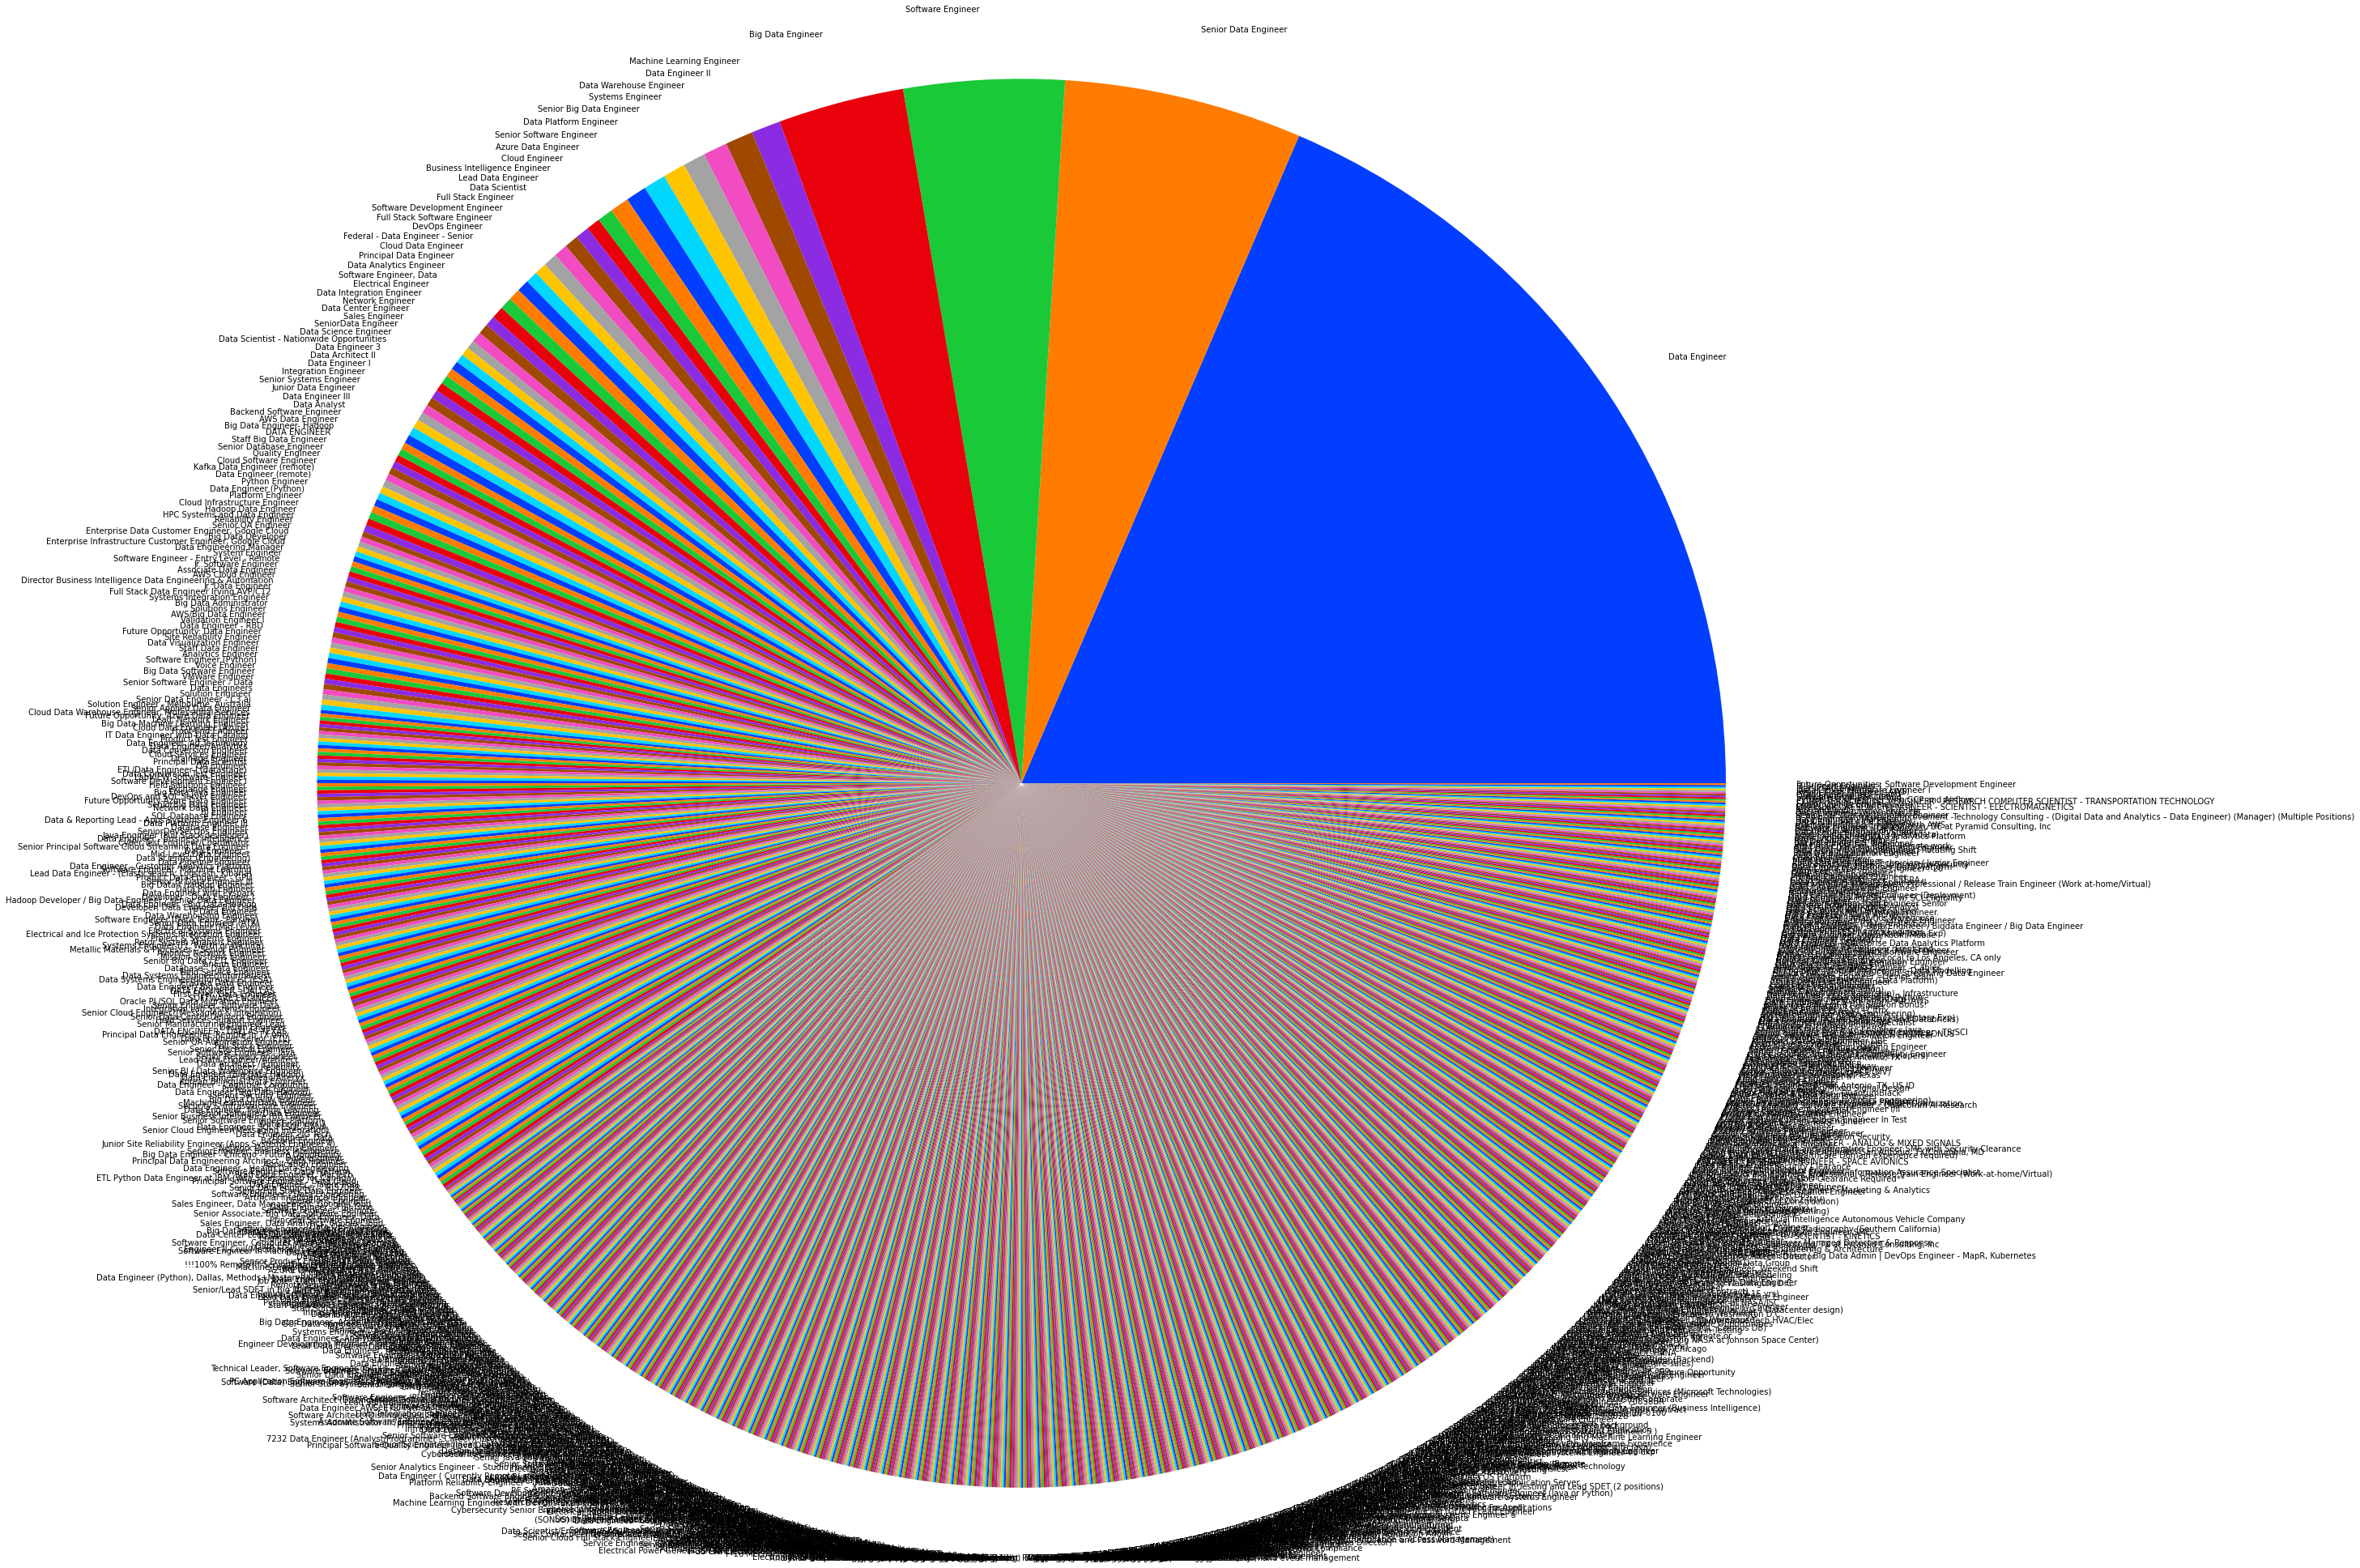

In [ ]:
plt.figure(figsize=(20,8))
# sns.lineplot(data=job_count, x='Job Title', y='Counts')
plt.pie(job_count['Counts'], labels=job_count['Job Title'], colors=sns.color_palette('bright'), radius=5)
# sns.heatmap(data=tmp.corr(), annot=True, linewidths=.5, cmap='Greens')
plt.show()

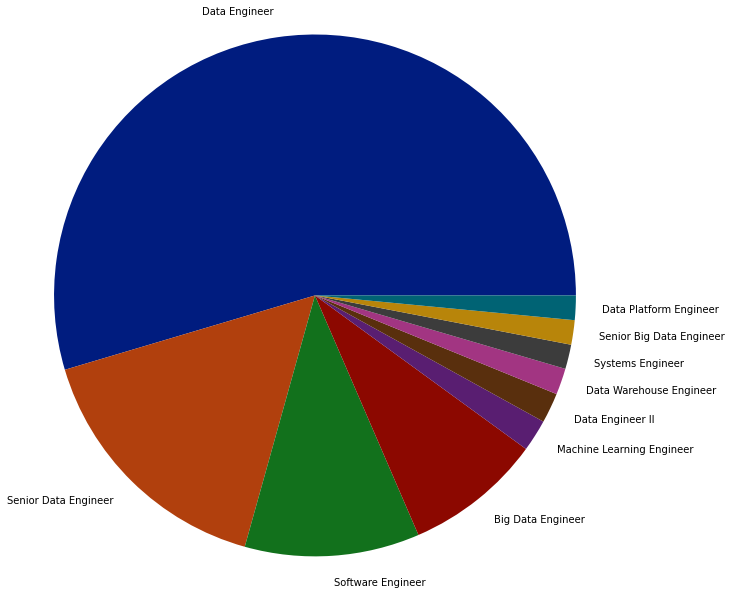

In [ ]:
plt.pie(job_count['Counts'].head(10), labels=job_count['Job Title'].head(10), colors=sns.color_palette('dark'), radius=3)
# sns.heatmap(data=tmp.corr(), annot=True, linewidths=.5, cmap='Greens')
plt.show()

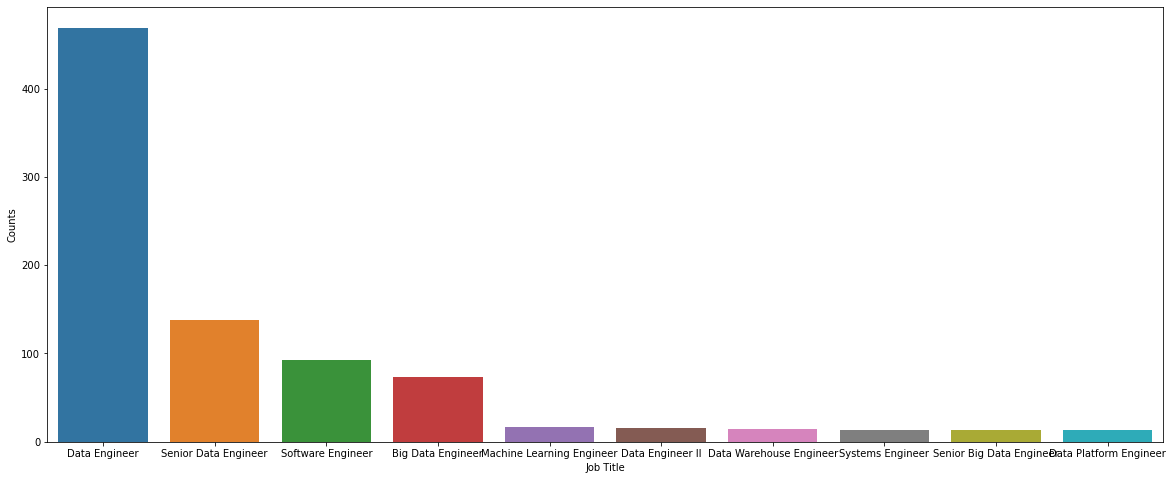

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Job Title', y='Counts', data=job_count.head(10))
plt.show()

In [ ]:
# plt.figure(figsize=(20,8))
# sns.barplot(x='Job Title', y='Salary', data=job_count['Job Title', 'Counts'].head(10))
# plt.show()
data['Max Salary'] = data['Max Salary'].str.strip()
data['Max Salary'] = data['Max Salary'].str.lstrip()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Job Description    2528 non-null   object 
 2   Rating             2528 non-null   float64
 3   Company Name       2528 non-null   object 
 4   Size               2528 non-null   object 
 5   Founded            2528 non-null   int64  
 6   Type of ownership  2528 non-null   object 
 7   Industry           2528 non-null   object 
 8   Sector             2528 non-null   object 
 9   Revenue            2528 non-null   object 
 10  Competitors        2528 non-null   object 
 11  Easy Apply         2528 non-null   object 
 12  City               2528 non-null   object 
 13  State              2528 non-null   object 
 14  Min Salary         2528 non-null   object 
 15  Max Salary         2528 non-null   object 
dtypes: float64(1), int64(1),

In [ ]:
data['Max Salary'].drop_duplicates().values

array(['150', '94', '154', '113', '75', '121', '117', '136', '167', '146',
       '106', '201', '164', '98', '108', '158', '210', '99', '72', '100',
       '107', '84', '92', '103', '123', '122', '104', '141', '126', '145',
       '187', '138', '97', '101', '166', '105', '130(Employer est.)',
       '281', '93', '135', '80', '53', '63', '181', '198', '132', '217',
       '151', '127', '124', '110', '109', '134', '188', '192', '199',
       '163', '96', '177', '85', '50', '77', '76', '120', '60', '160',
       '74', '89', '128'], dtype=object)

In [ ]:
data['Max Salary'] = data['Max Salary'].str.replace('\(Employer est.\)', '')
# data['Max Salary'] = data['Max Salary'].str.replace('(', '')
# data['Max Salary'] = data['Max Salary'].str.replace(')', '')

C:\Users\Pravasis Dhakal\AppData\Local\Temp\ipykernel_25372\2307782351.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Max Salary'] = data['Max Salary'].str.replace('\(Employer est.\)', '')


In [ ]:
data['Max Salary'].drop_duplicates().values

array(['150', '94', '154', '113', '75', '121', '117', '136', '167', '146',
       '106', '201', '164', '98', '108', '158', '210', '99', '72', '100',
       '107', '84', '92', '103', '123', '122', '104', '141', '126', '145',
       '187', '138', '97', '101', '166', '105', '130', '281', '93', '135',
       '80', '53', '63', '181', '198', '132', '217', '151', '127', '124',
       '110', '109', '134', '188', '192', '199', '163', '96', '177', '85',
       '50', '77', '76', '120', '60', '160', '74', '89', '128'],
      dtype=object)

In [ ]:
convert_dict = {'Max Salary': int}
data = data.astype(convert_dict)
# data['Max Salary'] = data['Max Salary'].astype(object).astype(int)

In [ ]:
data[['Job Title', 'Max Salary']].sort_values(by=['Max Salary'], ascending=False).head(10)

Job Title  Max Salary
1193                            Data Engineer - Manager         281
1192                                        BI Engineer         281
1186  Director Business Intelligence Data Engineerin...         281
1187                 machine learning Engineer with AWS         281
1188                        Data Engineer / IOT Company         281
1189                       Big Data - Software Engineer         281
1191                                 Lead Data Engineer         281
1190                                    VMWare Engineer         281
1199                      Data Engineer- Wilmington, DE         281
1198                           Python Software Engineer         281

In [ ]:
sorted_data = data[['Job Title', 'Max Salary']].sort_values(by=['Max Salary'], ascending=False)

In [ ]:
sorted_data = sorted_data[sorted_data['Max Salary'] == sorted_data['Max Salary'].max()]
sorted_data

Job Title  Max Salary
1193                            Data Engineer - Manager         281
1192                                        BI Engineer         281
1186  Director Business Intelligence Data Engineerin...         281
1187                 machine learning Engineer with AWS         281
1188                        Data Engineer / IOT Company         281
1189                       Big Data - Software Engineer         281
1191                                 Lead Data Engineer         281
1190                                    VMWare Engineer         281
1199                      Data Engineer- Wilmington, DE         281
1198                           Python Software Engineer         281
1197              Senior SSIS Data Integration Engineer         281
1196                                  Software Engineer         281
1195  IT Advisor, Performance Improvement -Technolog...         281
1194                                  Big Data Engineer         281

In [ ]:
data1 = data.groupby('Job Title')[['Min Salary', 'Max Salary']].mean()
data1.sort_values(by='Max Salary',ascending=False).head(25)

Max Salary
Job Title                                                     
machine learning Engineer with AWS                       281.0
Data Engineer- Wilmington, DE                            281.0
Data Engineer / IOT Company                              281.0
Data Engineer - Manager                                  281.0
Python Software Engineer                                 281.0
Senior SSIS Data Integration Engineer                    281.0
Big Data - Software Engineer                             281.0
IT Advisor, Performance Improvement -Technology...       281.0
Senior Staff Engineer, CAD                               217.0
Senior Software Systems Engineer                         217.0
Software Engineer III or IV                              217.0
Full-time Software Engineer                              217.0
Cell Culture Bioprocess Development Engineer             217.0
Software Architect (Distinguished Software Engi...       217.0
Remote Software Engineer                                 217.0
Software Architect (Distinguished Software Engi...       217.0
Lead Software Development Engineer in Test (SDET)        217.0
Back End Engineer (PHP)                                  217.0
Data Analyst - EDSS                                      217.0
Software Engineer - Developer Experience                 217.0
Data Integration Engineer - Full-Stack (Ruby on...       217.0
Validations Manager / Engineer                           217.0
Database Engineer (Temp)                                 217.0
eDiscovery Pre-Sales Engineer 19-0828                    210.0
Data Engineer, Virtualization                            210.0

In [ ]:
#Clean and Process Revenue Data

data1.show('Revenue')

In [ ]:
# 

plt.figure(figsize=(10, 5))
sns.barplot(x="Company Name", y="Avg Revenue", data=data.sort_values(by="Avg Revenue", ascending=False))
plt.xticks(rotation=90)
plt.title("Company Revenue Comparison")
plt.ylabel("Average Revenue ($)")
plt.show()
